# Model Testing Notebook

This notebook is designed to test different machine learning models on student data.

In [30]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# Charger les données
file_path = "generated_student_data.csv"  # Remplacez par le chemin de votre fichier CSV
data = pd.read_csv(file_path)

# Prévisualisation des données
print("Aperçu des données:")
print(data.head())


Aperçu des données:
     id             name  age gender preferred_language learning_mode  \
0  P001    Thomas Martin   23      M             Python      En ligne   
1  P002    Sophie Dubois   35      F         JavaScript    Présentiel   
2  P003    Lucas Bernard   19      M               Java    Alternance   
3  P004    Marie Laurent   45      F                SQL       Hybride   
4  P005  Alexandre Petit   28      M                C++    Présentiel   

                                      interests highest_academic_level  \
0  Intelligence Artificielle, Développement Web                Licence   
1                 UX Design, Mobile Development                 Master   
2                     Jeux vidéo, Cybersécurité                    Bac   
3          Data Analysis, Business Intelligence                    DUT   
4                       DevOps, Cloud Computing              Ingénieur   

           fields_of_study        institution  year_of_completion  \
0             Informatique 

## Étape 1 : Préparation des données

In [31]:
# Sélectionner les colonnes pertinentes
categorical_features = [
    'age',
    'preferred_language',
    'learning_mode',
    'highest_academic_level',
    'fields_of_study',
    'institution',
    'year_of_completion',
    'jobs'
]

# Gérer les valeurs manquantes pour 'jobs' si nécessaire
data['jobs'] = data['jobs'].fillna('No Job')

# Encoder les variables catégoriques (nos features)
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Créer la variable cible rank (si elle n'existe pas déjà)
def create_rank_category(years):
    if years == 0:
        return 'Débutant'
    elif years <= 2:
        return 'Junior'
    elif years <= 5:
        return 'Intermédiaire'
    elif years <= 10:
        return 'Senio'
    else:
        return 'Expert'

# Créer la colonne rank
data['rank'] = data['total_experience_years'].apply(create_rank_category)

# Encoder la variable cible (rank)
le_target = LabelEncoder()
y = le_target.fit_transform(data['rank'])

# Séparer les données en X (features) et y (cible)
X = data[categorical_features]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Étape 2 : Définir les modèles à tester

In [42]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=4),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}


## Étape 3 : Entraînement et évaluation

In [43]:
results = {}

for model_name, model in models.items():
    print(f"\nModèle: {model_name}")
    model.fit(X_train, y_train)
    
    # Scores sur les données d'entraînement
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')
    
    # Scores sur les données de test
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Train AUC: {train_auc:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test AUC: {test_auc:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))
    
    # Stocker les résultats
    results[model_name] = {
        'train_accuracy': train_accuracy,
        'train_auc': train_auc,
        'test_accuracy': test_accuracy,
        'test_auc': test_auc,
        'classification_report': classification_report(y_test, y_test_pred, output_dict=True)
    }


Modèle: Logistic Regression
Train Accuracy: 0.9077
Train AUC: 0.9915
Test Accuracy: 0.8715
Test AUC: 0.9847

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        39
           1       0.94      0.98      0.96       104
           2       0.62      0.68      0.65        22
           3       0.82      0.91      0.86        66
           4       0.88      0.79      0.83        57

    accuracy                           0.87       288
   macro avg       0.84      0.82      0.83       288
weighted avg       0.88      0.87      0.87       288


Modèle: Random Forest
Train Accuracy: 0.9732
Train AUC: 0.9984
Test Accuracy: 0.9514
Test AUC: 0.9949

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        39
           1       1.00      0.99      1.00       104
           2       1.00      0.73      0.84        22
           3       0

## Étape 4 : Comparaison des performances


Comparaison des modèles


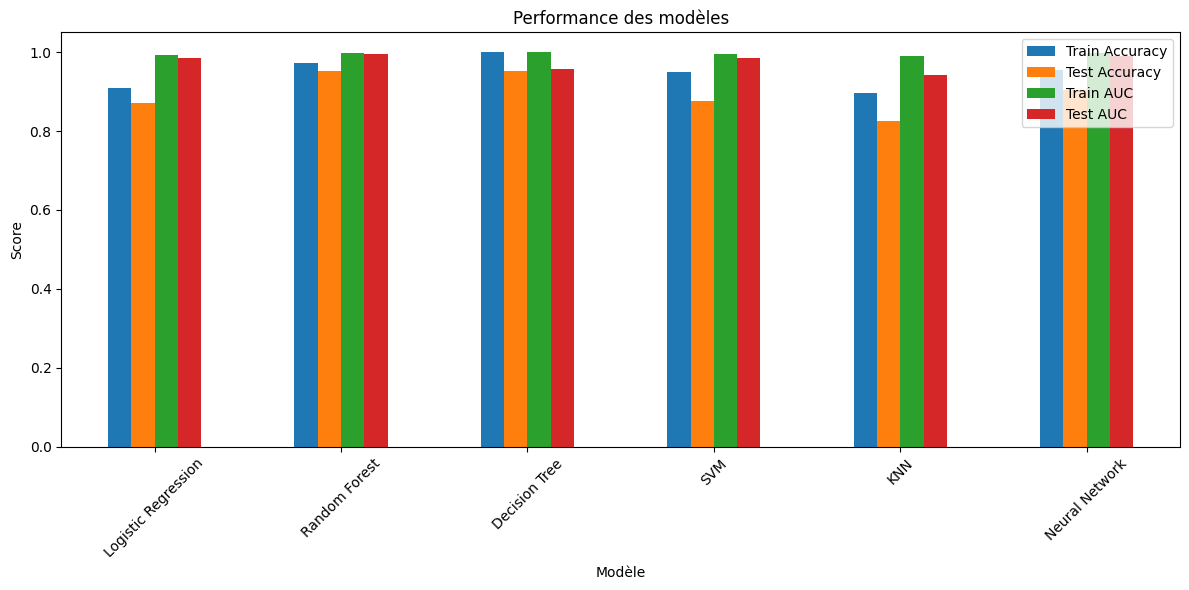

In [44]:
print("\nComparaison des modèles")
comparison = pd.DataFrame({
    model_name: {
        'Train Accuracy': results[model_name]['train_accuracy'],
        'Test Accuracy': results[model_name]['test_accuracy'],
        'Train AUC': results[model_name]['train_auc'],
        'Test AUC': results[model_name]['test_auc']
    } for model_name in results
}).T

# Création d'un graphique avec toutes les métriques
fig, ax = plt.subplots(figsize=(12, 6))
comparison.plot(kind='bar', ax=ax, title='Performance des modèles')
plt.xlabel('Modèle')
plt.ylabel('Score')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Étape 5 : Enregistrer le meilleur modèle

In [45]:
best_model_name = comparison['Test Accuracy'].idxmax()
best_model = models[best_model_name]
best_train_accuracy = comparison.loc[best_model_name, 'Train Accuracy']
best_test_accuracy = comparison.loc[best_model_name, 'Test Accuracy']
    
import joblib
joblib.dump(best_model, 'best_model.pkl')
print(f"Le meilleur modèle est {best_model_name} avec:")
print(f"- Accuracy d'entraînement: {best_train_accuracy:.4f}")
print(f"- Accuracy de test: {best_test_accuracy:.4f}")
print(f"Le modèle a été sauvegardé dans 'best_model.pkl'")


Le meilleur modèle est Random Forest avec:
- Accuracy d'entraînement: 0.9732
- Accuracy de test: 0.9514
Le modèle a été sauvegardé dans 'best_model.pkl'


In [46]:
max_depths = [2, 4, 6, 8, 10, 15, 20, 25, 30, None]
depth_scores = {
    'train_auc': [],
    'test_auc': [],
    'train_accuracy': [],
    'test_accuracy': []
}

for depth in max_depths:
    rf = RandomForestClassifier(
        max_depth=depth,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    # Scores d'entraînement
    y_train_proba = rf.predict_proba(X_train)
    y_train_pred = rf.predict(X_train)
    depth_scores['train_auc'].append(roc_auc_score(y_train, y_train_proba, multi_class='ovr'))
    depth_scores['train_accuracy'].append(accuracy_score(y_train, y_train_pred))
    
    # Scores de test
    y_test_proba = rf.predict_proba(X_test)
    y_test_pred = rf.predict(X_test)
    depth_scores['test_auc'].append(roc_auc_score(y_test, y_test_proba, multi_class='ovr'))
    depth_scores['test_accuracy'].append(accuracy_score(y_test, y_test_pred))

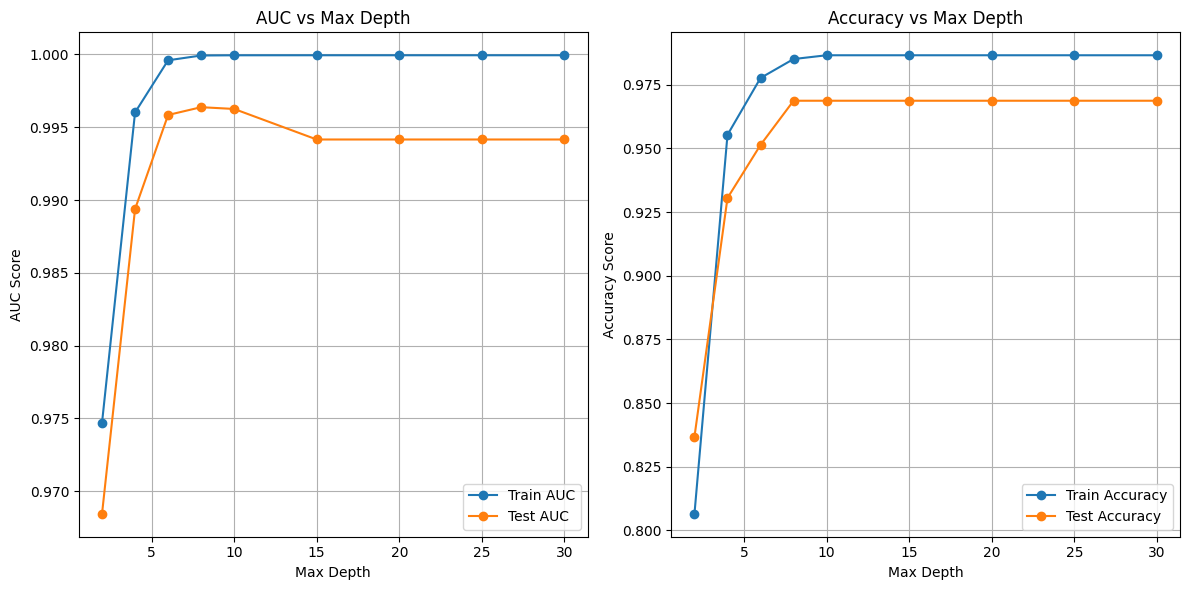

In [47]:
# Création du graphique
plt.figure(figsize=(12, 6))

# Courbe AUC
plt.subplot(1, 2, 1)
plt.plot(max_depths[:-1], depth_scores['train_auc'][:-1], label='Train AUC', marker='o')
plt.plot(max_depths[:-1], depth_scores['test_auc'][:-1], label='Test AUC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('AUC Score')
plt.title('AUC vs Max Depth')
plt.legend()
plt.grid(True)

# Courbe Accuracy
plt.subplot(1, 2, 2)
plt.plot(max_depths[:-1], depth_scores['train_accuracy'][:-1], label='Train Accuracy', marker='o')
plt.plot(max_depths[:-1], depth_scores['test_accuracy'][:-1], label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
best_depth_idx = np.argmax(depth_scores['test_auc'])
best_depth = max_depths[best_depth_idx]
print(f"\nMeilleure profondeur: {best_depth}")
print(f"AUC de test correspondant: {depth_scores['test_auc'][best_depth_idx]:.4f}")


Meilleure profondeur: 8
AUC de test correspondant: 0.9964
